In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\7 Clustering\EastWestAirlines.csv")

In [3]:
df=data.copy()

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
new_df=df.iloc[:,1:]

In [6]:
'''def norm_function(i):
    x=(i-i.min())/(i.max()-i.min())
    return x'''

'def norm_function(i):\n    x=(i-i.min())/(i.max()-i.min())\n    return x'

In [7]:
"""df_norm=norm_function(df.iloc[:,1:])"""

'df_norm=norm_function(df.iloc[:,1:])'

In [8]:
from sklearn.preprocessing import scale

In [9]:
norm_df=scale(new_df)

In [10]:
norm_df=pd.DataFrame(norm_df)

In [11]:
norm_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


## Finding Optimal number of clusters

In [12]:
from sklearn.cluster import KMeans

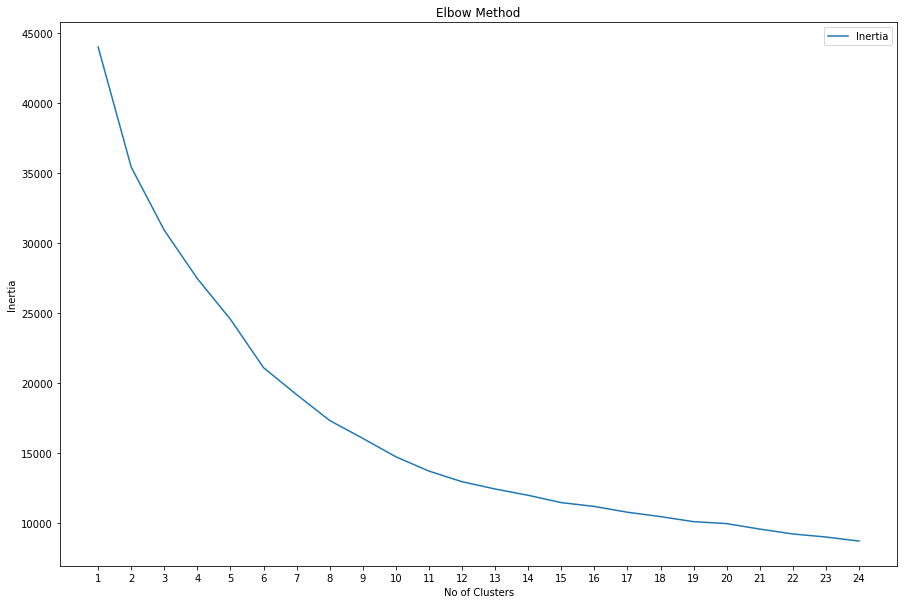

In [13]:
plt.figure(figsize=(15,10))
wcss=[]
for i in range(1,25):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(norm_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,25),wcss,label="Inertia")
plt.title("Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("Inertia")
plt.legend()
plt.xticks(range(1,25))
plt.show()

## Kmeans

In [14]:
kmeans =KMeans(n_clusters=6 , random_state=0)
predict=kmeans.fit_predict(norm_df)

In [15]:
predict

array([2, 2, 2, ..., 1, 2, 2])

In [16]:
df['K cluster_id']=predict

In [17]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


## Heirarchial Clustering

In [18]:
import scipy.cluster.hierarchy as sch

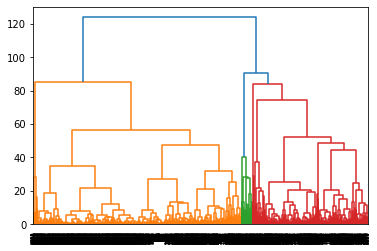

In [19]:
dendrogram=sch.dendrogram(sch.linkage(norm_df,method="ward"))

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage='ward')

In [22]:
h_clusters=model.fit(norm_df)

In [23]:
labels=model.labels_

In [24]:
labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [25]:
df["H cluster_id"]=labels

In [26]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K cluster_id,H cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,1


## DBSCAN

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
n = [(x, y) for x in range(1,6) for y in range(1,6)]

In [30]:
wcss=[]

for i in n:
    dbscan=DBSCAN(eps=i[0],min_samples=i[1])
    pred=dbscan.fit_predict(norm_df)
    wcss.append(silhouette_score(norm_df,pred))

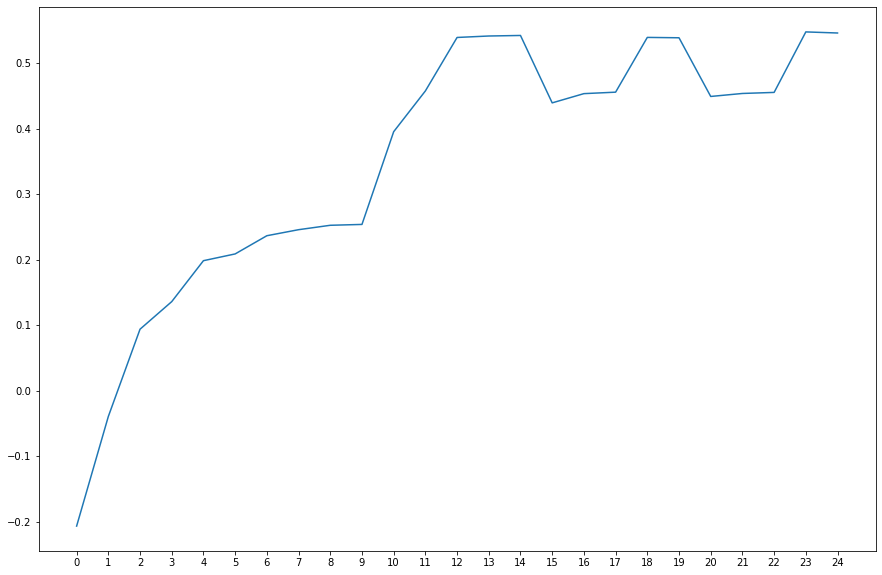

In [31]:
plt.figure(figsize=(15,10))
plt.plot(range(0,len(n)),wcss)
plt.xticks(range(0,len(n)))
plt.show()

### Higher the silhoutte_score the better the model

In [32]:
n[14]

(3, 5)

In [33]:
dbscan=DBSCAN(eps=3,min_samples=5)
pred=dbscan.fit_predict(norm_df)

In [34]:
print(silhouette_score(norm_df,pred))

0.5420774278401335


In [35]:
df["DBSCAN"]=pred

In [36]:
df.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,K cluster_id,H cluster_id,DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2,1,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1,0,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3,3,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1,0,0
